# BSによるデータセット1つに対する描画

In [2]:
from matplotlib import pyplot as plt
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# 学習データ(ガウスノイズ)
data = np.random.randn(50)  # shape: (50,)
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()
print("Train Data:", data)

# PyTorchテンソルに変換
train_data = torch.tensor(data, dtype=torch.float32).view(-1, 1)

# 必要ならCPUに移動
train_data = train_data.cpu()

# NumPy配列に変換
train_data_np = train_data.numpy()

# 重複ありのサンプリング
sampled_data = np.random.choice(train_data_np.flatten(), size=50, replace=True)

print("元データ:", train_data_np.flatten())
print("サンプリングデータ:", sampled_data)



Train Data: [ 7.81347860e-01  9.43535922e-02  9.44689681e-01  1.89173673e+00
 -9.39046944e-03 -9.37270677e-03  1.95252205e+00  1.07424517e+00
 -2.63988377e-01  8.30949329e-01 -2.57435535e-01 -2.59936994e-01
  5.05727355e-01 -1.82606713e+00 -1.62227455e+00 -3.64404536e-01
 -8.51855508e-01  5.83933824e-01 -7.38462937e-01 -1.28405186e+00
  1.82965513e+00 -3.27166676e-04  3.17004095e-01 -1.29751577e+00
 -3.45033015e-01  3.63953237e-01 -1.00133588e+00  6.50418393e-01
 -4.05897326e-01 -7.16444051e-02 -4.07052730e-01  2.24795624e+00
  2.29341269e-01 -9.00411756e-01  1.13386984e+00 -1.07690789e+00
  4.69917319e-01 -1.87625714e+00 -1.19304351e+00  4.56931758e-01
  1.04290403e+00  4.29350485e-01  1.18822257e-01 -8.18251897e-02
 -1.35569458e+00 -5.34867856e-01 -2.54428971e-01  1.38766313e+00
  6.15710774e-01 -1.66351975e+00]
元データ: [ 7.81347871e-01  9.43535939e-02  9.44689691e-01  1.89173675e+00
 -9.39046964e-03 -9.37270653e-03  1.95252204e+00  1.07424521e+00
 -2.63988376e-01  8.30949306e-01 -2.57

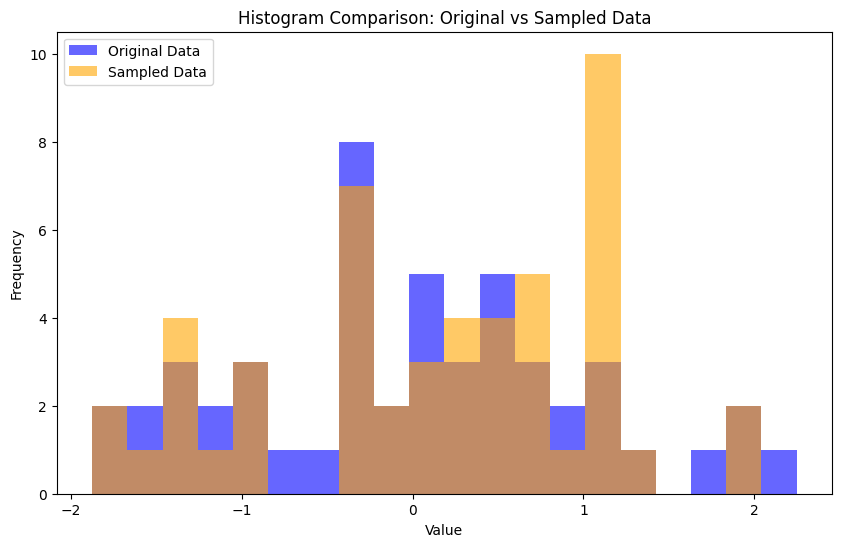

In [3]:
# 共通のビン境界を定義
min_value = min(train_data_np.min(), sampled_data.min())  # 最小値
max_value = max(train_data_np.max(), sampled_data.max())  # 最大値
bins = np.linspace(min_value, max_value, 21)  # 20個の区間に分ける（ビン境界を21個）

# ヒストグラムのプロット
plt.figure(figsize=(10, 6))

# 元データのヒストグラム
plt.hist(train_data_np.flatten(), bins=bins, alpha=0.6, color='blue', label='Original Data')

# サンプリングデータのヒストグラム
plt.hist(sampled_data, bins=bins, alpha=0.6, color='orange', label='Sampled Data')

# グラフの装飾
plt.title('Histogram Comparison: Original vs Sampled Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

# 表示
plt.show()